# Breast Cancer Classification Project for DABN22

## Introduction
In this project, I intend to use machine learning algorithms in order to classify tumors as malignant or benign. The data that will be used is the kaggle dataset "Breast Cancer Diagnosis Dataset - Wisconsin State" which contains tumor characteristics as well as professional classifications of tumor types. 

The aims of this project are three-fold. Firstly, the aim is to import, wrangle and clean the data as well as preforming some simple pre-processing such as label encoding. Secondly, the aim is to train and evaluate some relevant machine learning classification models, and to examine which of the variables that are most important. Finally the intention is to conclude which model is the best and which variables that were most important.

## Packages

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

#Pre-processing and metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

#Models from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Data
## Data wrangling
As mentioned in the introduction, the data used is the kaggle dataset "Breast Cancer Diagnosis Dataset - Wisconsin State" which contain information on tumor tissue samples. The feature "Sample code number" is an unique identifier for each sample and "Class" is wether the tumor is benign or malignant. The remaining nine features are 1 to 10 values of tumor characteristics assigned manually following a microscopic examination of the tissue sample.

In [2]:
features = ["Sample code number", "Clump Thickness",
          "Uniformity of Cell Size", "Uniformity of Cell Shape",
          "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
          "Mitoses", "Class"]

In [3]:
df = pd.read_csv("breast-cancer-wisconsin.data",
                 sep=',',
                 names=features)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


The feature *Bare Nuclei* is the wrong data type. And upon changing this, some NAs are introduced. These are accounted for by filling them with the mean value of the feature. The resulting data typ thus becomes float instead of integer as the rest of the dataset, this will be become unimportant when the dataset is standardised later in the analysis.

In [5]:
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)

In [6]:
df['Bare Nuclei'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 699 entries, 0 to 698
Series name: Bare Nuclei
Non-Null Count  Dtype  
--------------  -----  
699 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


Finally, a label encoder is applied to "class" which assigns benign tumors to *class 0* and malignant tumors to *class 1*. This enables us to phrase questions such as *is the tumor malignant?* and having *Class = 1* be interpeted as *yes*. The feature "Sample code number" is also dropped as we dont have a need of identifying a singular tumor from this point.

In [7]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
le.classes_ #Benign 0, Malignant 1
df.drop(features[0], axis=1, inplace=True)

# Analysis
## Setup
In this section the data will be divided first into y and X and then further into test and training data. The split between the training and testing will be 80% of the data as training data and 20% as test data. The X data is also scaled using the StandardScaler to ensure that none of the models encounter any issues with the input data.

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## Models
The methods and models used in this project are some standard parametric an non-parametric methods which are commonly used in classification tasks. This project utilizes the general nature of sci-kit learns way of training and fitting various models in order to use a multitude of models by only providing training data to a function and choosing which model to use. This enables us to offload some of the code into a separate script. The exception is the Multi-layer Perceptron classifier which requires some more specific inputs which is aqquired from the scikit-learn documentation page. 

In [11]:
from Project_support import fit_and_predict_models

In [12]:
#Fitting models and predicting using a custom made function
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier()
}

predictions = fit_and_predict_models(models, X_train, y_train, X_test)

##Defining and learning the neural network seperately
mlp = MLPClassifier(
    solver='adam',
    alpha=1e-5,
    hidden_layer_sizes=(15,),
    max_iter = 500,
    random_state=42)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_prob_mlp = mlp.predict_proba(X_test)[:, 1]

## Evaluation
In this part we will examine how the models classified the tumors and the evaluation will consist of three parts. Firstly confusion matrices are generated with a custom made function which show actual vs predicted classifications. Secondly we will look at both accuracies and area under the curve (or AUC-score) of the models and finally we will see how the Random Forest model assigned variable importance.

### Confusion matricies

In [13]:
from Project_support import plot_confusion_matrices

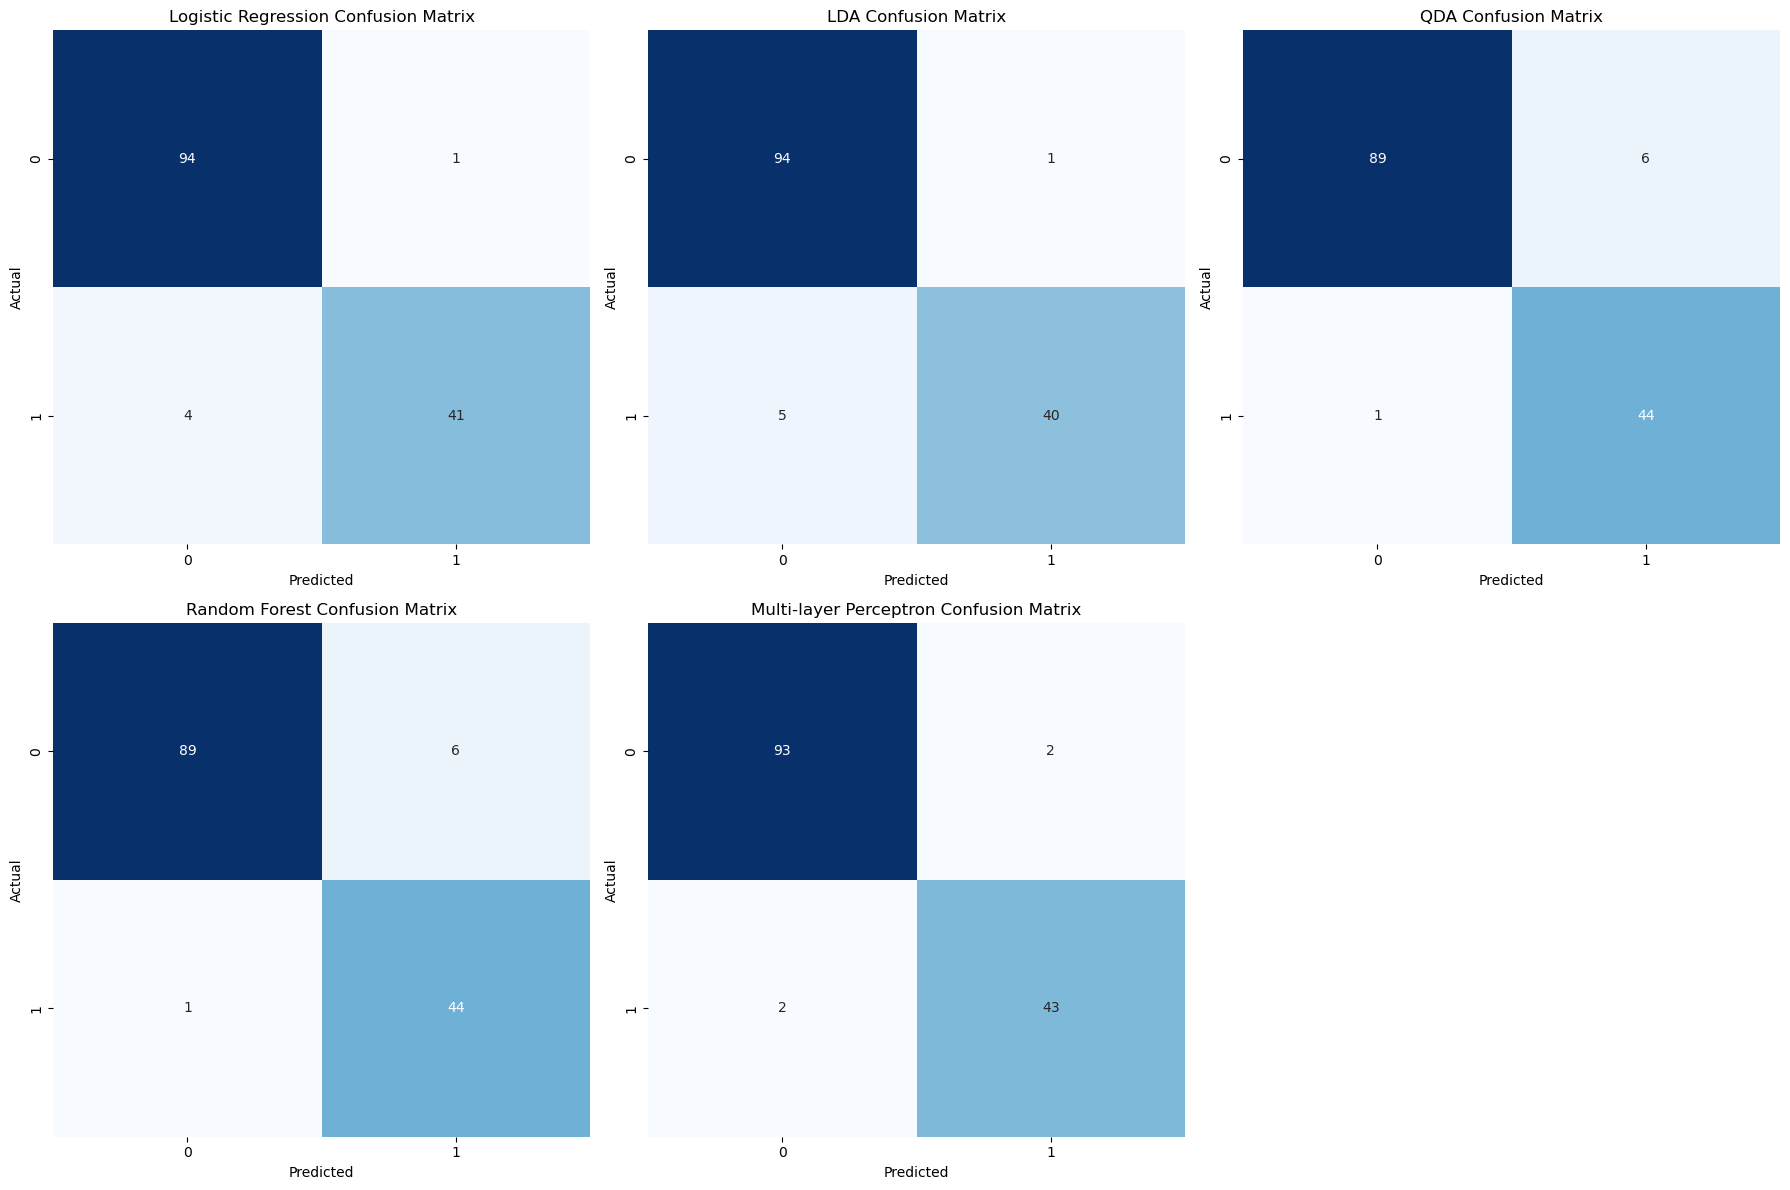

In [14]:
#Extracting predictions
y_pred_lr = predictions['Logistic Regression']
y_pred_lda = predictions['LDA']
y_pred_qda = predictions['QDA']
y_pred_rf = predictions['Random Forest']

#Creating confusion matricies
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_qda = confusion_matrix(y_test, y_pred_qda)
cm_rf = confusion_matrix(y_test, y_pred_qda)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

confusion_matrices = [cm_lr, cm_lda, cm_qda, cm_rf, cm_mlp]
titles = ['Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'Multi-layer Perceptron']

#Generating confusion matrices using a custom made function
plot_confusion_matrices(confusion_matrices, titles)

The plotted confusion matrices above show that all of the models were quite succesful in assigning the tumor to the correct class. Since the data is concerned with cancer classification, it would be reasonable to prioritise avoiding false negatives where the the model predicts the tumor to be benign but it actually is malignant. This could be achieved by shifting the threshold where the predicted probability assigns the observation to a class untill false negatives become zero. Another point of interest here is that the test dataset is quite unbalance as twice as many tumors were benign compared to malignant.

### Accuracies and AUCs
Accuracy is the percentage of correct classifications, while AUC is the area under the reciever operating curve (ROC) which plots predictive capabilities across different classification thresholds. This means that values close to 1 for both metrics indicate effective models.

In [15]:
from Project_support import fit_and_predict_probabilites_models, calculate_metrics

In [16]:
#Fitting models and predicting probabilities using a custom made function
predicted_probabilities = fit_and_predict_probabilites_models(models, X_train, y_train, X_test)

#Manually appending the MLP predictions
predictions['MLP'] = y_pred_mlp
predicted_probabilities['MLP'] = y_pred_prob_mlp

#Calculating metrics using a custom function
metrics_df = calculate_metrics(y_test, predictions, predicted_probabilities)
print(metrics_df)

                 Model  Accuracy    AUC
0  Logistic Regression     0.964  0.996
1                  LDA     0.957  0.996
2                  QDA     0.950  0.988
3        Random Forest     0.964  0.996
4                  MLP     0.971  0.997


From the table above, we can clearly see that all models were very succesful, both in terms of accuracy and AUC.

### Variable importance

When conducting an analysis with Random Forest and decision trees in general there is a possibility to include variable importance, which is a statistic defined as the mean decrease in impurity resulting from a split. 

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_names = ["Clump Thickness",
          "Uniformity of Cell Size", "Uniformity of Cell Shape",
          "Marginal Adhesion", "Single Epithelial Cell Size",
          "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli",
          "Mitoses"]

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
2,Uniformity of Cell Shape,0.292698
1,Uniformity of Cell Size,0.215664
5,Bare Nuclei,0.170237
6,Bland Chromatin,0.102734
7,Normal Nucleoli,0.086737
4,Single Epithelial Cell Size,0.062375
0,Clump Thickness,0.044721
3,Marginal Adhesion,0.019627
8,Mitoses,0.005206


As can be seen from the table above, the uniformity of cell size and shape was the most important feature that the Random Forest model used in order to predict the class of the tumors. This statistic is somewhat problematic however, since it is derived from the training data we can not make any certain statement on which features are most important to make good predictions on other data. 

# Conclusion
This project has aimed to use the data from Winsconsin State in order to predict the *type* of breast cancer tumors using various machine learning models. In the first step, the data was cleaned and repaired succesfully, furthermore the data was scaled before model application. The models were then created with a "blackbox" approach where a custom made function only used the data and model choice as inputs (with exception of the Multi-layer Perceptron (MLP) model which required some additional specification) was used. A point of potential future imporvement is that tuning parameters for the MLP and Random Forest models could have been cross-validated. Furthermore, the evaluation was carried out in three steps: Firstly the confusion matrices were considered where all models performed very good and quite similar to each other, we also noted that we had an imbalanced test dataset. Accuracies and the models AUCs were then examined and all of the models again preformed really good with both metrics in the high 90's for all models. This does not neccesarily mean that the larger problem is particularly easy, rather that the dataset was *kind* and included a lot the potential variation needed to make correct predictions. We also found what the Random Forest algorithm ranked as the most important features that it itself used to predict the classes, these were *Uniformity of Cell Size* and *Uniformity of Cell Shape*. 

In conclusion this project successfully used five machine learning models to predict the the *type* of breast cancer tumors using data of tumor characteristics described by manual observations.